# Chapter 9 - Multivariate Analysis of Variance (MANOVA) and Discriminant Analysis

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt
from scipy import stats

### MANOVA (Multivariate Analysis of Variance)

#### Definition:
MANOVA is an extension of ANOVA (Analysis of Variance) that is used **when there are two or more dependent variables that are correlated**. It tests whether the mean differences among groups on a combination of dependent variables are likely to have occurred by chance.

#### Key Concepts:
- **Dependent Variables**: Multiple continuous dependent variables.
- **Independent Variables**: One or more categorical independent variables (factors).
- **Hypothesis**:
    - **Null Hypothesis ($H_0$)**: There is no difference in the means of the groups across the multiple dependent variables.
    - **Alternative Hypothesis ($H_1$)**: At least one group mean is different for the dependent variables.

#### Assumptions:
- Multivariate normality.
- Homogeneity of variance-covariance matrices (Box's M test).
- Independence of observations.

#### Applications:
MANOVA is used in situations where researchers are interested in examining how independent variables affect multiple dependent variables simultaneously, for example in educational testing, psychological studies, and marketing research.


In [4]:
data = {'quant': [5, 2, 6, 9, 8, 7, 9, 10, 10],
       'verbal': [2, 1, 3, 7, 9, 8, 8, 10, 9],
        'train': [1, 1, 1, 2, 2, 2, 3, 3, 3]}

df_manova = pd.DataFrame(data)

df_manova

,quant,verbal,train
0,5,2,1
1,2,1,1
2,6,3,1
3,9,7,2
4,8,9,2
5,7,8,2
6,9,8,3
7,10,10,3
8,10,9,3


In [5]:
df_manova.dtypes

quant     int64
verbal    int64
train     int64
dtype: object

In [6]:
cols = ['train']

for col in cols:
    df_manova[col] = df_manova[col].astype('category')
    
df_manova.dtypes

quant        int64
verbal       int64
train     category
dtype: object

In [7]:
from statsmodels.multivariate.manova import MANOVA

maov = MANOVA.from_formula('quant + verbal ~ train', data = df_manova)

print(maov.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
         Intercept        Value  Num DF Den DF F Value Pr > F
-------------------------------------------------------------
            Wilks' lambda 0.1635 2.0000 5.0000 12.7885 0.0108
           Pillai's trace 0.8365 2.0000 5.0000 12.7885 0.0108
   Hotelling-Lawley trace 5.1154 2.0000 5.0000 12.7885 0.0108
      Roy's greatest root 5.1154 2.0000 5.0000 12.7885 0.0108
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         train           Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda  0.0561 4.0000 10.0000  8.0555 0.0036
         Pillai's trace  1.0737 4.0000 12.0000  3.4775 0.0417
 Hotelling-Lawley trace 14

#### Intercept (Overall Test for Group Differences):

    The F-values for these statistics are all 12.7885 with a p-value = 0.0108.

Interpretation: These values suggest that there are significant differences between the groups across the multivariate dependent variables (p-value < 0.05). This indicates that at least one group mean differs significantly for the combination of dependent variables.

#### Train (Effect of Train Factor):

The F-values are:

             Wilks' Lambda: 8.0555 (p-value = 0.0036)
            Pillai's Trace: 3.4775 (p-value = 0.0417)
    Hotelling-Lawley Trace: 17.8112 (p-value = 0.0033)
       Roy's Greatest Root: 43.0547 (p-value = 0.0003)

Interpretation: All tests show strong evidence against the null hypothesis, suggesting that the "train" factor significantly influences the dependent variables. The significant p-values (especially for Hotelling-Lawley and Roy's Greatest Root) highlight that the independent variable "train" has a substantial effect on the response variables.

    We reject the null hypothesis of equality of mean vectors and conclude that at least one mean population vector on the train variable is different from another.

### Discriminant Analysis: Binary Response

Linear Discriminant Analysis (LDA) is a supervised machine learning technique primarily used for classification. It is used to find the linear combination of features that best separates two or more classes in the data. It maximizes the ratio of between-class variance to within-class variance, making it ideal for dimensionality reduction and classification tasks.

In [12]:
data_discrim = {'y': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
               'x1': [4, 3, 3, 2, 2, 8, 7, 5, 3, 3],
               'x2': [2, 1, 2, 2, 5, 3, 4, 5, 4, 2]}

df_discrim = pd.DataFrame(data_discrim)

df_discrim

,y,x1,x2
0,0,4,2
1,0,3,1
2,0,3,2
3,0,2,2
4,0,2,5
5,1,8,3
6,1,7,4
7,1,5,5
8,1,3,4
9,1,3,2


For these data, we would like to discriminate groups 0 and 1 on y using predictors x1 and x2. This will call for a single discriminant function to be produced since there are only two categories on the response. 

In [14]:
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
X = np.array([[4, 2], [3, 1], [3, 2], [2, 2], [2, 5], [8, 3], [7, 4], [5, 5], [3, 4], [3, 2]])

print("y:", y)
print()
print("X:", X)

y: [0 0 0 0 0 1 1 1 1 1]

X: [[4 2]
 [3 1]
 [3 2]
 [2 2]
 [2 5]
 [8 3]
 [7 4]
 [5 5]
 [3 4]
 [3 2]]


We can automatize it:

In [16]:
# DataFrame creation
data_discrim = {'y': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
               'x1': [4, 3, 3, 2, 2, 8, 7, 5, 3, 3],
               'x2': [2, 1, 2, 2, 5, 3, 4, 5, 4, 2]}

df_discrim = pd.DataFrame(data_discrim)

# Extracting y (dependent variable)
y = df_discrim['y'].values  # Converts the 'y' column to a NumPy array

# Extracting X (independent variables)
X = df_discrim[['x1', 'x2']].values  # Converts the 'x1' and 'x2' columns to a NumPy array

# Print the results
print("y:", y)
print()
print("X:", X)

y: [0 0 0 0 0 1 1 1 1 1]

X: [[4 2]
 [3 1]
 [3 2]
 [2 2]
 [2 5]
 [8 3]
 [7 4]
 [5 5]
 [3 4]
 [3 2]]


In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)  # Create an LDA model with 1 component for dimensionality reduction
lda.fit(X, y)                                     # Fit the LDA model using X (features) and y (target labels)

LinearDiscriminantAnalysis(n_components=1)

In [18]:
scores = lda.transform(X)  # Apply the fitted LDA model to the feature matrix X to transform it into the lower-dimensional space
scores

array([[-0.43107609],
       [-1.35954768],
       [-0.92847159],
       [-1.42586708],
       [-0.1326388 ],
       [ 1.98958197],
       [ 1.92326257],
       [ 1.35954768],
       [-0.0663194 ],
       [-0.92847159]])

The output of `lda.transform(X)` represents the transformed data in the new, lower-dimensional space created by the Linear Discriminant Analysis (LDA) model. Since you set `n_components=1` (as indicated by the result being a 1D array), LDA has reduced the data to a single dimension.

The scores array shows the transformed values of the original feature matrix X along the linear discriminant (LD). These values represent the projection of each data point in the original feature space onto the line (the direction) that best separates the classes.

Significance of Values:

    A positive value indicates that the data point is closer to the class with a higher mean in the new LDA space.
    A negative value indicates that the data point is closer to the class with a lower mean.
    The magnitude of the value represents how far the data point is from the separation line (the discriminant axis).

That is, the first case in our data via the model, obtained a discriminant score of –0.43, the second case –1.36 (rounded up), and so on.

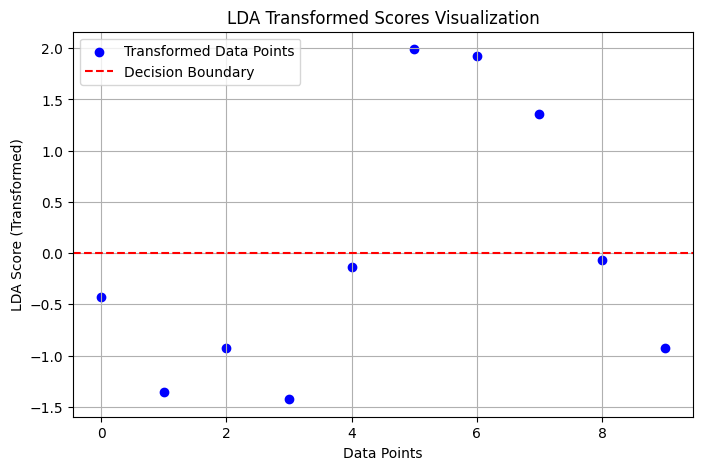

In [20]:
# Create a simple scatter plot of the scores
plt.figure(figsize=(8, 5))
plt.scatter(np.arange(len(scores)), scores, color='blue', label='Transformed Data Points')

# Add labels and title
plt.axhline(0, color='red', linestyle='--', label='Decision Boundary')  # Adding a decision boundary at 0
plt.xlabel('Data Points')
plt.ylabel('LDA Score (Transformed)')
plt.title('LDA Transformed Scores Visualization')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

We can obtain the coefficients to the discriminant function using `lda.coef_`:

In [22]:
print(lda.coef_)

[[0.85106383 0.73758865]]


In [23]:
print(lda.intercept_)

[-5.61702128]


These are the raw unstandardized discriminant function coefficients. The constant for the function is equal to –3.283, and hence we can now use the function to generate discriminant scores:

In [25]:
print(lda.scalings_)

[[0.49739549]
 [0.43107609]]


    y = -3.283 + 0.49739549(x1) + 0.43107609(x2)

In [27]:
x11 = 4
x21 = 2

y = -3.283 + 0.49739549 * (x11) + 0.43107609 * (x21)
y

-0.4312658599999999

Notice that the computation agrees (within rounding error) with the first score generated by Python earlier. 

In [29]:
scores[0]

array([-0.43107609])

The value of each discriminant function evaluated at group means can be computed:

In [31]:
m = np.dot(lda.means_ - lda.xbar_, lda.scalings_)
m

array([[-0.85552025],
       [ 0.85552025]])

That is, the mean of the function at y = 0 is equal to –0.855 while the mean of the function at y = 1 is 0.856. Next, we will use the discriminant functions to predict group membership using `model.predict()`:

In [33]:
pred = lda.predict(X)   # lda == model
pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

We can see that the model correctly predicts the first five cases (0, 0, 0, 0, 0), which
recall were all in the designated “0” group. It also correctly classifies the first three
cases of the five cases in group “1” (1, 1, 1, 0, 0). Notice it misclassifies the last two cases
(0, 0). Hence, cases 9 and 10 were misclassified. We can obtain a convenient summary
of this via what is known as a confusion matrix:

In [35]:
from sklearn.metrics import confusion_matrix

y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Predict class labels (0 or 1) using LDA
pred = lda.predict(X)

# Print Prediction
print("pred:",pred)
print()

# Print confusion matrix
print(confusion_matrix(y, pred))

pred: [0 0 0 0 0 1 1 1 0 0]

[[5 0]
 [2 3]]


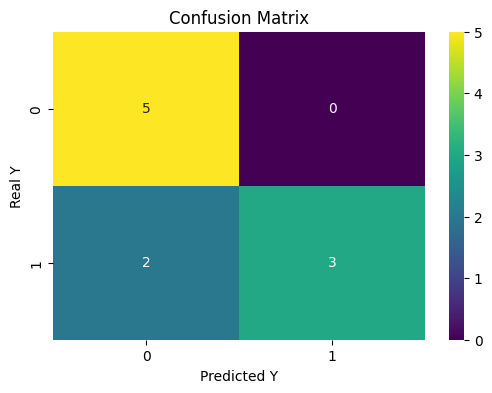

In [36]:
# Generate the confusion matrix
cm = confusion_matrix(y, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Y')
plt.ylabel('Real Y')
plt.title('Confusion Matrix')
plt.show()

### Polytomous Classification

In [38]:
train = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3])
X = np.array([[5, 2], [2, 1], [6, 3], [9, 7], [8, 9], [7, 8], [9, 8], [10, 10], [10, 9]])

model = lda.fit(X, train)
model

LinearDiscriminantAnalysis(n_components=1)

In [39]:
print(lda.scalings_)

[[ 0.02983363  0.83151527]
 [ 0.9794679  -0.59019908]]


In [40]:
lda.transform(X).shape

(9, 1)

In [41]:
lda.transform(X)

array([[-4.31397269],
       [-5.38294147],
       [-3.30467116],
       [ 0.70270131],
       [ 2.63180348],
       [ 1.62250195],
       [ 1.68216921],
       [ 3.67093863],
       [ 2.69147074]])

In [42]:
pred = model.predict(X)
pred

array([1, 1, 1, 2, 2, 2, 2, 3, 3])

In [43]:
train

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

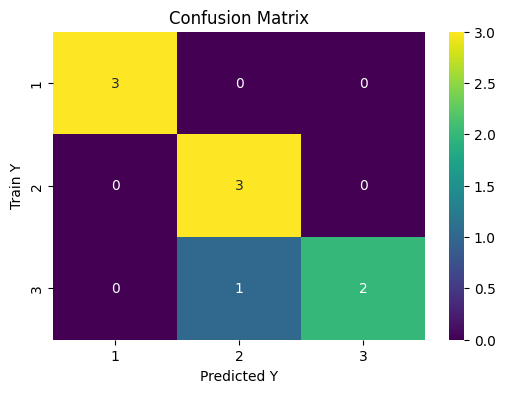

In [44]:
# Generate the confusion matrix
cm2 = confusion_matrix(train, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='viridis', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.xlabel('Predicted Y')
plt.ylabel('Train Y')
plt.title('Confusion Matrix')
plt.show()